# **Ejemplo** 5 Árboles de decisión

## Introducción

En este ejemplo vamos a aplicar árboles de decisión a problemas de regresión y clasificación. En particular, utilizaremos árboles de regresión para predecir el precio mediano de las casas en Boston y para predecir la aceptabilidad de los autos.

## 1: Construir un árbol de regresión
#### ¿Cómo se construye un árbol de regresión?

Se utiliza un algorítmo voraz (greedy) de **división binaria recursiva:**

- Comenzar en la raíz del árbol.
- Para cada atributo, examinar cada punto de corte posible y elegir el atributo y punto de corte de manera que el árbol resultante de hacer la división tenga el **menor error cuadrático medio (ECM)**.
- Repetir el proceso para las dos ramas resultantes y nuevamente hacer una sola división (en cada rama) para minimizar el ECM.
- Repitir este proceso hasta que se cumpla un criterio de detención.

**¿Cómo sabe cuándo parar?**

1. Podríamos definir un criterio de detención, como la **profundidad máxima** del árbol o **el número mínimo de muestras en la hoja**.
2. También podríamos hacer crecer el árbol grande y luego "podarlo" utilizando algún método de poda como "cost complexity pruning"

### 1.a  Realizar un análisis descriptivo del dataset

El set de entrenamiento es el viejo y conocido dataset de Boston. El objetivo es predecir el precio mediano de los condados.   

Instrucciones:

1. Leer los datos con Pandas.
- Explorar los datos ordenándolos o graficándolos.

In [30]:
# Leer los datos con Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.datasets import load_boston
#data = load_boston()
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['price'])

In [24]:
#from sklearn.datasets import load_boston
#data = load_boston()

### 2: Construir un árbol de regresión con scikit-learn

Como puede intuirse, construir un árbol a mano no es tan fácil. Ahora vamos autilizar scikit-learn para construir un árbol de regresión óptimo. 
Hacer lo siguiente:

- Mapear la columna `type` a una variable binaria
- Crear una matriz `X` que contenga los valores de los atributos y un vector `y` que contenga los precios
- Partir los datos en entrenamiento-testeo usando un `random_state`=42 y un `test_size` del 30%
- Importar e inicializar el `DecisionTreeRegressor` de scikit-learn
- Ajustarlo al set de entrenamiento
- Predecir los valores del set de testeo
- Mostrar los valores predichos y reales en un gráfico
- Usar r2_score para juzgar la bondad de la regresión

In [32]:
# partimos en entrenamiento-prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [33]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
y

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [35]:
# Importar el DecisionTreeRegressor, inicializarlo y ajustarlo al set de entrenamiento
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1,criterion='squared_error')
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [36]:
# Predecir los precios del set de prueba
preds = treereg.predict(X_test)

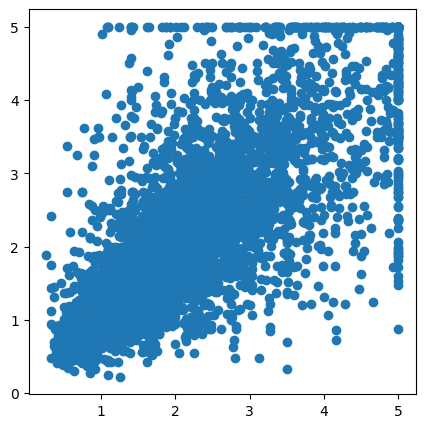

In [37]:
# Mostrar los valores predichos y reales en un gráfico
plt.figure(figsize=(5,5))
plt.scatter(preds, y_test);

In [38]:
# Usar r2_score para obtener la bondad de la regresion
from sklearn.metrics import r2_score
r2_score(y_test, preds) 

0.6124752686045866

In [12]:
preds_train = treereg.predict(X_train)

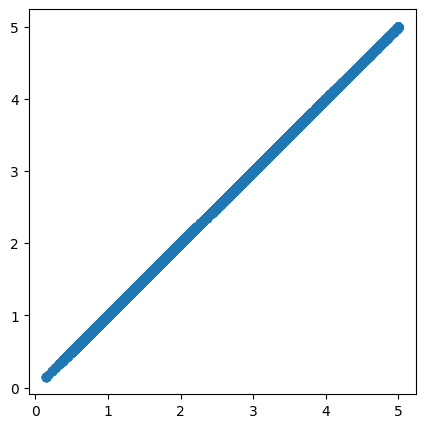

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(preds_train, y_train);

In [14]:
from sklearn.metrics import r2_score
r2_score(y_train, preds_train)

1.0

### 2.b Parámetros globales

El `DecisionTreeRegressor` ofrece pocos parámetros globales que se pueden cambiar en la inicialización. Por ejemplo, se pueden establecer los parámetros `max_depth` o `min_samples_leaf` e imponer limitaciones globales en el espacio de las soluciones.

1. Utilizar `cross_val_score` y hacer validación cruzada de 3-fold para encontrar el valor óptimo para `max_depth` (explorar los valores 1 - 10). Tener en cuenta que tendrá que establecer `scoring='neg_mean_squared_error'` como criterio para el score. Establecer siempre `random_state=1`
- Graficar el error como función de `max_depth`

In [15]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [16]:
# Usar cross-validation para encontrar el mejor max_depth
from sklearn.model_selection import cross_val_score
import numpy as np

Mejor score: 0.7816360044653105
Mejor depth: 5


DecisionTreeRegressor(max_depth=5, random_state=1)

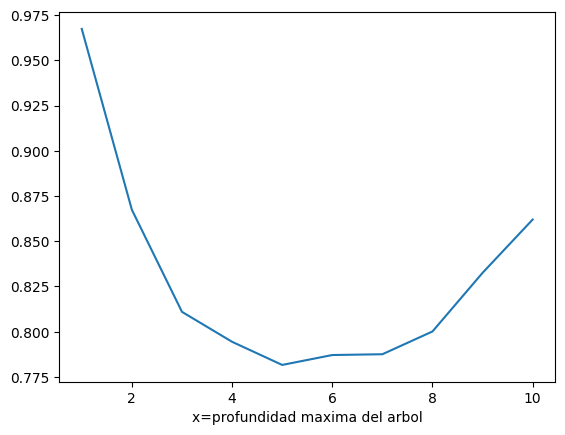

In [39]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # Selecciona el mejor comparando con el mejor hasta ahora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # Agrega a la lista de scores para graficar
    all_scores.append(current_score)
    
print("Mejor score: %s" % best_score)
print("Mejor depth: %s" % best_depth)

# Graficar el error como función del max_depth
plt.figure()
plt.plot(range(1, 11), all_scores)
plt.xlabel('x=profundidad maxima del arbol')

# Ajustar el modelo utilizando la mejor max_depth
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

In [18]:
all_scores

[0.9673262335061131,
 0.8673775030459332,
 0.8109699491114911,
 0.7944189578070194,
 0.7816360044653105,
 0.7871034692988053,
 0.7875432093155997,
 0.8001209059511721,
 0.8325345013046502,
 0.8619901947520495]

In [40]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### 2.c Importancia de los atributos

La clase DecisionTreeRegressor expone un atributo llamado `feature_importances_`. Es la contribunción a la reducción en la métrica de error utilizada (en este caso, MSE) a lo largo de todo el árbol. 

1. Comprobar la importancia de cada atributo. ¿Cuál es la más importante? ¿De qué otra forma podríamos visualizar esta importancia de forma más simple?

In [41]:
pd.DataFrame({'atributo':data.feature_names, 'importancia':treereg.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
0,MedInc,0.772240
5,AveOccup,0.130096
1,HouseAge,0.043070
2,AveRooms,0.031606
6,Latitude,0.018526
4,Population,0.003709
7,Longitude,0.000752
3,AveBedrms,0.000000


### 2.d Visualización del árbol

Seguir el ejemplo de la [documentación](http://scikit-learn.org/stable/modules/tree.html) para visualizar el árbol.  
Podría ser necesario instalar `pydotplus` si aún no lo tiene instalado.

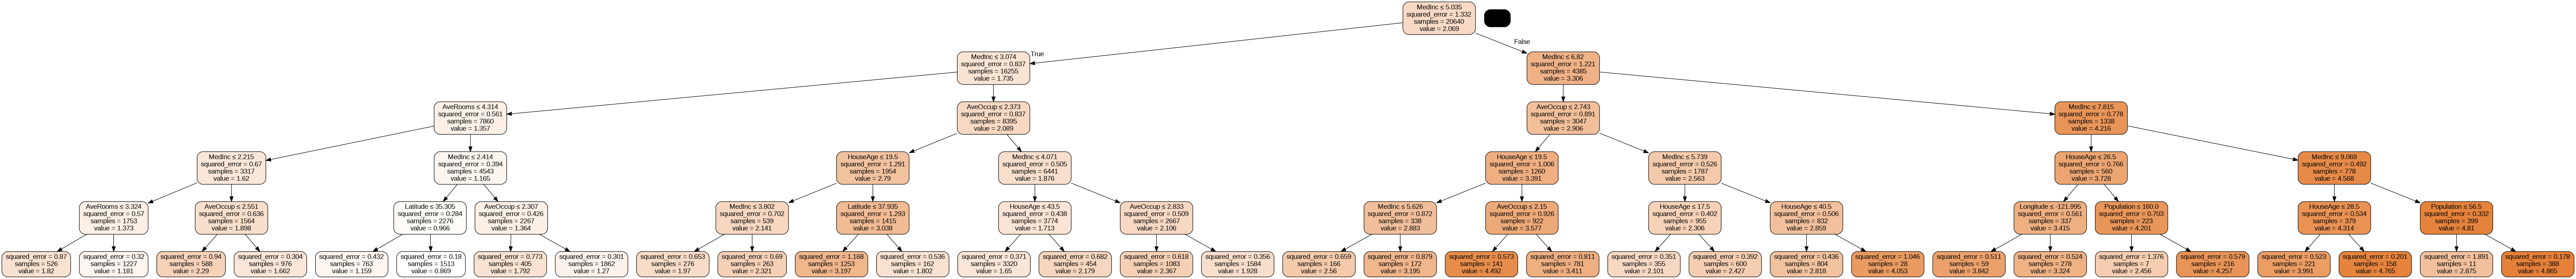

In [42]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=export_graphviz(treereg, out_file=None,  
                feature_names=data.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

#### Interpretando el diagrama de un árbol

¿Cómo leer este árbol de decisión?

**Nodos internos:**

- `samples` es el número de observaciones en el nodo antes de ser dividido. (verificar que es la suma del valor `samples` de sus nodos hijos)
- `mse` es el error cuadrático medio calculado comparando los valores observados de respuesta en ese nodo con el valor medio de respuesta en ese nodo
- La primera línea es la condición utilizada para dividir ese nodo (ir a la izquierda si es verdadera, ir a la derecha si es falsa)

**Hojas:**

- `samples` es el número de observaciones en el nodo
- `value` es el valor medio de respuesta en ese nodo
- `mse` es el error cuadrático medio calculado comparando los valores observados de respuesta en ese nodo frente a `value`

### 2.e Usar GridSearchCV para encontrar el mejor Árbol de Regresión

¿Cómo sabemos que la poda con profundidad máxima (max_depth) es el mejor modelo para nosotros? Los árboles ofrecen una variedad de formas de pre-poda (es decir, le decimos a la computadora cómo diseñar el árbol resultante con ciertas restricciones).

Medida            | Que hace
------------------|-------------
max_depth         | limita la altura del árbol (niveles-2)
max_features      | limita la cantidad de atributos a utilizar en una división
max_leaf_nodes    | limita la cantidad máxima de nodos hoja puede tener el árbol
min_samples_leaf  | cantidad mínima de muestras de una hoja
min_samples_split | cantidad mínima de muestras para dividir un nodo

1. Inicialice rangos razonables para todos los parámetros y encuentre la combinación óptima utilizando Grid Search.

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
DecisionTreeRegressor(max_depth=4, max_features=4, max_leaf_nodes=10,
                      random_state=1)
-0.8180767705689636
0.9044759646165085


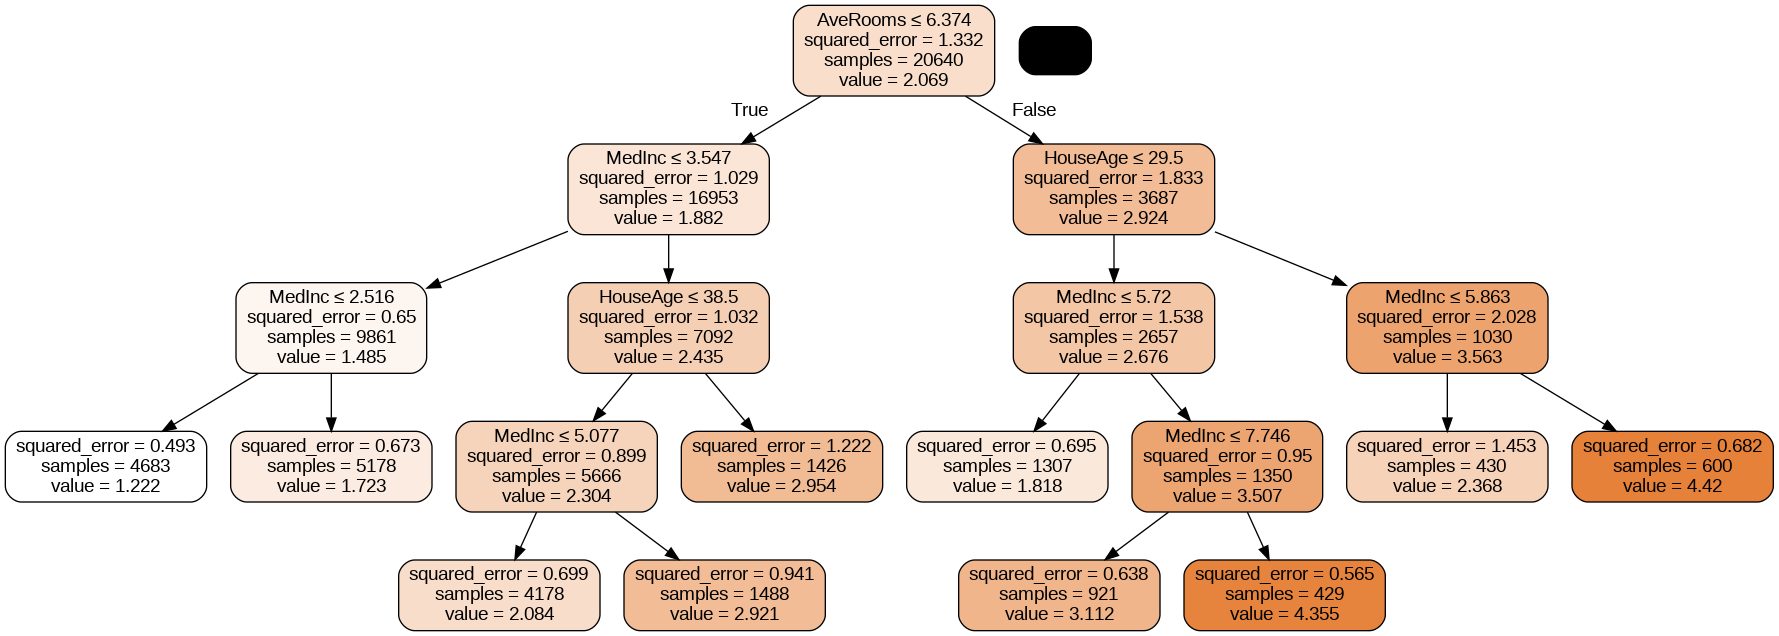

In [43]:
from sklearn.model_selection import GridSearchCV

PARAMETROS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[2,3,4]}

#Se hace la búsqueda con Grid Search
model = DecisionTreeRegressor(random_state=1)
gs = GridSearchCV(model, PARAMETROS, scoring='neg_mean_squared_error', verbose=1 , n_jobs=-1)
gs.fit(X, y)

# Se muestran los mejores resultados
print(gs.best_estimator_)
print(gs.best_score_)
print(np.sqrt(-gs.best_score_))

# Se grafica el mejor arbol
dot_data=export_graphviz(gs.best_estimator_, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  